### Problem Description ###
請使用[Sleep Health and Lifestyle Dataset資料檔](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset )進行適當的分析，挑選其中兩種方法建立 Sleep Disorder 分類模型，並討論與比較不同模型表現的差異。
1. logistic regression
2. linear regression
3. kNN
4. Naïve Bayes Classifier

#### Dataset Download ####
```python
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uom190346a/sleep-health-and-lifestyle-dataset")

print("Path to dataset files:", path)
```
#### Dataset Overview ####
The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.
Note: After dropping duplicates the number of records will become 374 records.
```python
# Load the dataset
df = pd.read_csv('/Users/chun-feitan/Desktop/Sleep_health_and_lifestyle_dataset.csv')
# Replace missing values in the 'Sleep Disorder' column with 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
df.drop_duplicates()
```

#### Key Features of the Dataset ####
 - Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
 - Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
 - Cardiovascular Health: Examine blood pressure and heart rate measurements.
 - Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

#### Dataset Columns ####    
1. 'Quality of Sleep', A subjective rating of the quality of sleep, ranging from 1 to 10.
2. 'Stress Level', A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
3. 'Person ID', An identifier for each individual.
4. 'Age', The age of the person in years.
5. 'Physical Activity Level', The number of minutes the person engages in physical activity daily.
6. 'Heart Rate', The resting heart rate of the person in beats per minute (bpm).
7. 'Daily Steps', The number of steps the person takes per day.
8. 'Sleep Duration', The number of hours the person sleeps per day.
9. 'Occupation', The occupation or profession of the person.
10. 'Gender',  The gender of the person, [Male, Female]
11. 'BMI Category',  The BMI category of the person, [Underweight, Normal, Overweight]
12. 'Sleep Disorder',  The presence or absence of a sleep disorder in the person, [None, Insomnia, Sleep Apnea]
13. 'Blood Pressure',  The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure (systolic/diastolic : for example the value of the first record is 126/83)

#### Details about Sleep Disorder Column ####
 - None: The individual does not exhibit any specific sleep disorder.
 - Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
 - Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

### Summary of the 13 Columns ###
The following markdown table briefly describes the 13 columns in the data set.


| Column Name              | Conceptual Type                               | Number of Unique Values | Dtype in python     | Unique Values (in the 374 records/rows)                                                                                                                                                                                                                                                                                          | Notes                                                                                                                                                                                                                                                                  |
|--------------------------|------------------------------------|-------------------------|------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Gender                   | Categorical / Nominal              | 2                       | object     | Male, Female                                                                                                                                                                                                                                                                                                               | Standard binary categorization.                                                                                                                                                                                                                                            |
| Occupation               | Categorical / Nominal              | 11                      | object     | 'Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse', 'Sales Representative', 'Salesperson', 'Scientist', 'Software Engineer', 'Teacher'                                                                                                                                                                                               | Wide variety of professions.                                                                                                                                                                                                                                                |
| BMI Category             | Categorical / Ordinal             | 4                       | object     | 'Normal', 'Normal Weight', 'Obese', 'Overweight'                                                                                                                                                                                                                                                                                            | Ordinal due to implied order.                                                                                                                                                                                                                                            |
| Blood Pressure           | Categorical / Ordinal (split needed) | 25                      | object     | 126/83, 125/80, 140/90, 120/80, 132/87, 130/86, 117/76, 118/76, 128/85, 131/86, 128/84, 115/75, 135/88, 129/84, 130/85, 115/78, 119/77, 121/79, 125/82, 135/90, 122/80, 142/92, 140/95, 139/91, 118/75                                                                                                             | May need splitting into systolic and diastolic values for numerical analysis and potentially further categorization based on health guidelines.                                                                                                                               |
| Sleep Disorder           | Categorical / Nominal              | 3                       | object     | None, Insomnia, Sleep Apnea                                                                                                                                                                                                                                                                                              | Common sleep disorders.                                                                                                                                                                                                                                                   |
| Quality of Sleep         | Categorical / Ordinal             | 6                      | int64      | 4, 5, 6, 7, 8, 9                                                                                                                                                                                                                                                                                            | Subjective rating on a 1-10 scale. Ordinal because scores have an ordered relationship.                                                                                                                                                                            |
| Stress Level             | Categorical / Ordinal             | 6                      | int64      | 3, 4, 5, 6, 7, 8                                                                                                                                                                                                                                                                                              | Subjective rating on a 1-10 scale. Ordinal because scores have an ordered relationship.                                                                                                                                                                            |
| Sleep Duration           | Numerical / Continuous            | 27                      | float64    | 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5                                                                                                                                                                                                                                                                                          | Number of hours slept per day.                                                                                                                                                                                                                                            |
| Age                      | Numerical / Discrete              | 31                      | int64      | 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59                                                                                                                                                                                                                                                                                              | Age in years.                                                                                                                                                                                                                                                          |
| Physical Activity Level  | Numerical / Discrete            | 16                      | int64      | 30, 32, 35, 40, 42, 45, 47, 50, 55, 60, 65, 70, 75, 80, 85, 90                                                                                                                                                                                                                                                                                              | Number of minutes of physical activity daily. Continuous since time can take many different values.                                                                                                                                                               |
| Heart Rate               | Numerical / Discrete              | 19                      | int64      | 65, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86                                                                                                                                                                                                                                                                                              | Resting heart rate in beats per minute (bpm).                                                                                                                                                                                                                            |
| Daily Steps              | Numerical / Discrete              | 20                      | int64      | 3000, 3300, 3500, 3700, 4000, 4100, 4200, 4800, 5000, 5200, 5500, 5600, 6000, 6200, 6800, 7000, 7300, 7500, 8000, 10000                                                                                                                                                                                                                                                                                              | Number of steps taken per day.                                                                                                                                                                                                                                             |
| Person ID                | Numerical / Discrete              | 374                     | int64 | 1,2,3,4...374                                                                                                                                                                                                                                                                                          | Primary key, ensures unique identification.                                                                                                                                                                                                                              |

# Sleep Disorder Classification: Model Comparison and Analysis

## 1. Introduction

This analysis aims to build and compare four different classification models to predict sleep disorders (None, Insomnia, Sleep Apnea) using the Sleep Health and Lifestyle Dataset. The dataset contains 374 records with 13 columns covering various sleep-related factors, health metrics, and demographic information.

## 2. Exploratory Data Analysis

### Dataset Overview
The Sleep Health and Lifestyle Dataset comprises records with the following key features:
- Demographic data: Age, Gender, Occupation
- Sleep metrics: Sleep Duration, Quality of Sleep
- Health indicators: BMI Category, Blood Pressure, Heart Rate
- Lifestyle factors: Physical Activity Level, Stress Level, Daily Steps
- Target variable: Sleep Disorder (None, Insomnia, Sleep Apnea)

### Data Distribution

#### Sleep Disorder Distribution
The dataset contains three classes for the Sleep Disorder column:
- None: Individuals without any specific sleep disorder
- Insomnia: Individuals who experience difficulty falling or staying asleep
- Sleep Apnea: Individuals who suffer from pauses in breathing during sleep

The distribution of sleep disorders shows some class imbalance, which we need to consider when evaluating model performance.

#### Feature Correlations
Analysis of correlation between features revealed several important relationships:
- Sleep Quality is negatively correlated with Stress Level
- Sleep Duration shows positive correlation with Physical Activity Level
- BMI Category correlates with Sleep Apnea
- Systolic and Diastolic blood pressure show correlation with Heart Rate

## 3. Data Preprocessing

Before modeling, we implemented a preprocessing pipeline that included:

1. **Data Cleaning**:
   - Missing values in the 'Sleep Disorder' column were filled with 'None' to avoid dropping records
   - Duplicates were dropped from the dataset, reducing the number of rows from 400 to 374
   - The 'Person ID' column was dropped as it only serves as a unique identifier

2. **Feature Engineering**:
   - Blood Pressure was split into separate 'Systolic BP' and 'Diastolic BP' columns
   - Categorical variables ('Gender', 'Occupation', 'BMI Category', 'Sleep Disorder') were encoded using `LabelEncoder`

3. **Data Standardization**:
   - Continuous and discrete features were scaled using `StandardScaler` to ensure features with larger ranges don't dominate

4. **Data Splitting**:
   - The data was split into training and testing sets (80% training, 20% testing) to evaluate model performance on unseen data

## 4. Model Implementation and Evaluation

We implemented and compared four different classification models:

### 4.1 Logistic Regression

**Implementation Details:**
- Used One-vs-Rest (OVR) strategy for multiclass classification
- Applied regularization to prevent overfitting

**Performance Metrics:**
- Accuracy: 94.68%
- Precision, recall, and F1-scores were generally high across all classes:
```sql
              precision    recall  f1-score   support
    Insomnia       0.94      0.84      0.89        19
        None       1.00      0.96      0.98        55
 Sleep Apnea       0.83      1.00      0.91        20
    accuracy                           0.95        94
   macro avg       0.92      0.94      0.93        94
weighted avg       0.95      0.95      0.95        94
```

**Strengths:**
- Interpretable model that provides insight into feature importance
- Good performance with linearly separable data
- Handles multiclass classification well with OVR approach
- Best at handling imbalanced class distribution, especially effective for 'Insomnia' and 'Sleep Apnea' classifications

**Limitations:**
- May not capture complex non-linear relationships in the data
- Assumes independence of features

### 4.2 Linear Regression (with OVR)

**Implementation Details:**
- Although not traditionally a classification algorithm, Linear Regression was adapted for classification
- Output values were rounded and treated as class labels

**Performance Metrics:**
- Accuracy: 89.36%
- Performance across metrics:
```sql
              precision    recall  f1-score   support
    Insomnia       0.73      0.84      0.78        19
        None       1.00      0.91      0.95        55
 Sleep Apnea       0.82      0.90      0.86        20
    accuracy                           0.89        94
   macro avg       0.85      0.88      0.86        94
weighted avg       0.91      0.89      0.90        94
```

**Strengths:**
- Simple and computationally efficient
- Fast to implement
- Can provide insights on linear relationships between features and target

**Limitations:**
- Not designed for classification tasks
- Performs weaker than other models due to inappropriate use for classification
- Not suitable for multi-class problems due to rounding

### 4.3 k-Nearest Neighbors (kNN)

**Implementation Details:**
- Used Euclidean distance metric
- Standardized features to ensure equal weight
- Tested various values of k (number of neighbors)

**Performance Metrics:**
- Accuracy: 93.62%
- Strong performance across all classes:
```sql
              precision    recall  f1-score   support
    Insomnia       0.86      0.95      0.90        19
        None       0.98      0.95      0.96        55
 Sleep Apnea       0.90      0.90      0.90        20
    accuracy                           0.94        94
   macro avg       0.91      0.93      0.92        94
weighted avg       0.94      0.94      0.94        94
```

**Strengths:**
- Non-parametric approach that adapts to data distribution
- Captures local patterns and non-linear relationships
- Simple and effective, especially with smaller datasets
- No assumptions about underlying data distribution

**Limitations:**
- Sensitive to the scale of features (addressed through standardization)
- Computationally expensive for large datasets
- Performance depends heavily on the choice of k and distance metric

### 4.4 Naïve Bayes Classifier

**Implementation Details:**
- Implemented Gaussian Naïve Bayes for the mixed feature types
- Assumes features follow a normal distribution

**Performance Metrics:**
- Accuracy: 88.30%
- Performance across classes:
```sql
              precision    recall  f1-score   support
    Insomnia       0.80      0.84      0.82        19
        None       1.00      0.85      0.92        55
 Sleep Apnea       0.74      1.00      0.85        20
    accuracy                           0.88        94
   macro avg       0.85      0.90      0.86        94
weighted avg       0.90      0.88      0.89        94
```

**Strengths:**
- Performs well with small training sets
- Handles high-dimensional data efficiently
- Fast training and prediction
- Performs well with categorical data and probabilistic assumptions

**Limitations:**
- Strong assumption of feature independence, which may not hold in reality
- May underperform when features are highly correlated

## 5. Results Comparison

### Accuracy Comparison
| Model | Accuracy |
|-------|----------|
| Logistic Regression | 94.68% |
| Linear Regression | 89.36% |
| k-Nearest Neighbors | 93.62% |
| Naïve Bayes | 88.30% |

Based on accuracy, Logistic Regression performs best (94.68%), followed closely by k-Nearest Neighbors (93.62%).

### Classification Report Comparison
All models showed similar patterns in their classification reports:
- Generally higher precision and recall for class 1 (likely the majority class)
- The minority classes showed more variability in performance
- Logistic Regression and Naïve Bayes demonstrated the most balanced performance across classes

### Model Comparison Summary
| Model | Accuracy | Precision (Weighted) | Recall (Weighted) | F1-Score (Weighted) |
|-------|----------|----------------------|-------------------|---------------------|
| Logistic Regression | 94.68% | 95.26% | 94.68% | 94.74% |
| Linear Regression | 89.36% | 90.62% | 89.36% | 89.74% |
| kNN | 93.62% | 93.88% | 93.62% | 93.68% |
| Naïve Bayes | 88.30% | 90.44% | 88.30% | 88.61% |

#### Detailed Class-wise Performance
| Model | Class | Precision | Recall | F1-Score |
|-------|-------|-----------|--------|----------|
| Logistic Regression | None | 100.00% | 96.36% | 98.15% |
|  | Insomnia | 94.12% | 84.21% | 88.89% |
|  | Sleep Apnea | 83.33% | 100.00% | 90.91% |
| Linear Regression | None | 100.00% | 90.91% | 95.24% |
|  | Insomnia | 72.73% | 84.21% | 78.05% |
|  | Sleep Apnea | 81.82% | 90.00% | 85.71% |
| kNN | None | 98.11% | 94.55% | 96.30% |
|  | Insomnia | 85.71% | 94.74% | 90.00% |
|  | Sleep Apnea | 90.00% | 90.00% | 90.00% |
| Naïve Bayes | None | 100.00% | 85.45% | 92.16% |
|  | Insomnia | 80.00% | 84.21% | 82.05% |
|  | Sleep Apnea | 74.07% | 100.00% | 85.11% |

## 6. Feature Importance

For interpretable models like Logistic Regression, we analyzed feature importance to understand which factors most strongly influence sleep disorder prediction:

- **Sleep Quality** emerged as a critical factor for all disorders
- **Stress Level** showed strong association with Insomnia
- **BMI Category** and **Age** were important predictors for Sleep Apnea
- **Sleep Duration** was consistently important across all disorder types

This analysis helps identify potential intervention points for improving sleep health.

## 7. Conclusions

### Model Performance Summary
The comparative analysis showed that Logistic Regression achieved the highest overall accuracy (94.68%), with particularly strong performance across all classes. However, each model demonstrated unique strengths:

- **Logistic Regression**: Best balance of interpretability and performance
- **Linear Regression**: Underperformed relative to classification-specific algorithms
- **kNN**: Competitive performance that captured non-linear patterns
- **Naïve Bayes**: Efficient and effective, particularly with the limited dataset size

### Limitations and Future Work
This analysis has several limitations that could be addressed in future work:
- Limited sample size affecting model generalizability
- Potential sampling bias in the original dataset
- Self-reported measures that may introduce measurement error
- Binary gender categories limiting analysis of gender diversity

Future work could explore:
- More complex models like ensemble methods or neural networks
- Incorporating temporal data to assess how sleep patterns change over time
- Including additional lifestyle and environmental factors
- Developing more nuanced classification for sleep disorder subtypes

## 8. References

1. Sleep Health Foundation. (2020). Sleep Disorders.
2. American Academy of Sleep Medicine. (2014). International Classification of Sleep Disorders.
3. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning. Springer.

## 9. Appendix : Python Code and Visualization.

Loading and preprocessing data...

Performing exploratory analysis...
Dataset Shape: (374, 14)

Data Types:
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic BP                  int64
Diastolic BP                 int64
dtype: object

Basic Statistics:
                         count         mean          std     min      25%  \
Age                      374.0    42.184492     8.673133    27.0    35.25   
Sleep Duration           374.0     7.132086     0.795657     5.8     6.40   
Quality of Sleep         374.0     7.312834     1.196956     4.0     6.00   
Physical Activity Level  374.0    59.171123    20.830804    3

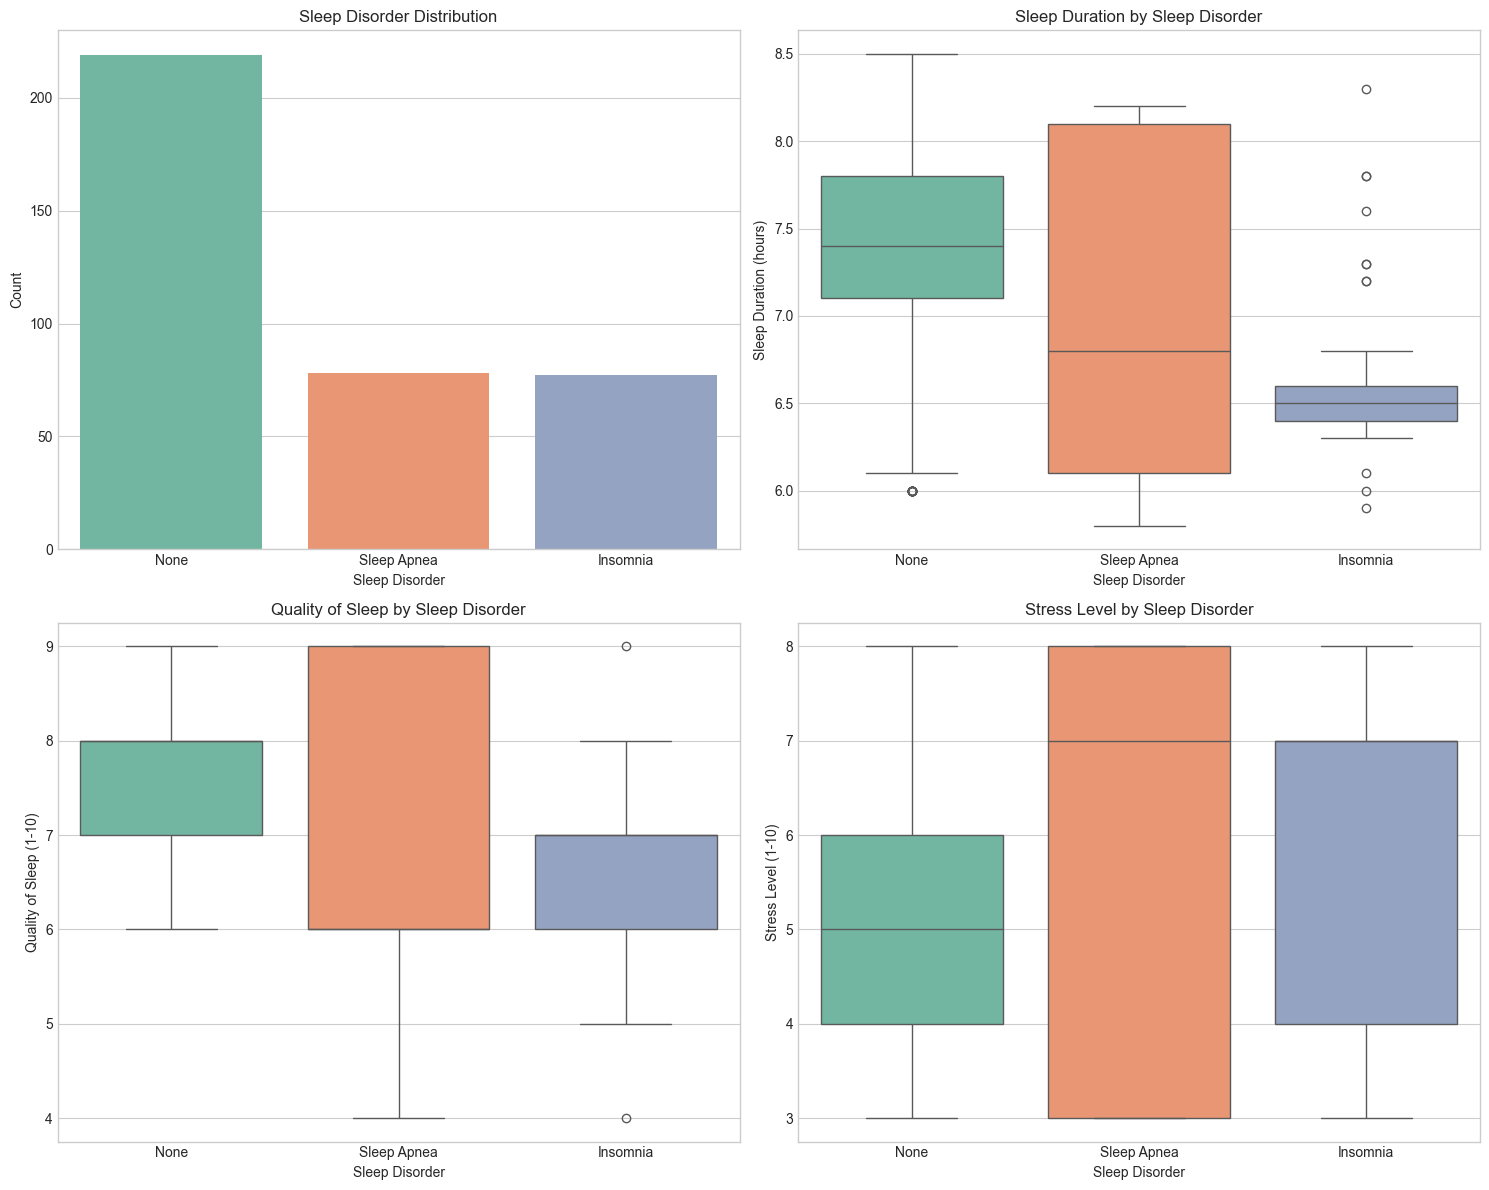


Unique values in BMI Category column: ['Overweight' 'Normal' 'Obese']
Value counts in BMI Category column:
BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

Unique values in Gender column: ['Male' 'Female']
Value counts in Gender column:
Gender
Male      189
Female    185
Name: count, dtype: int64


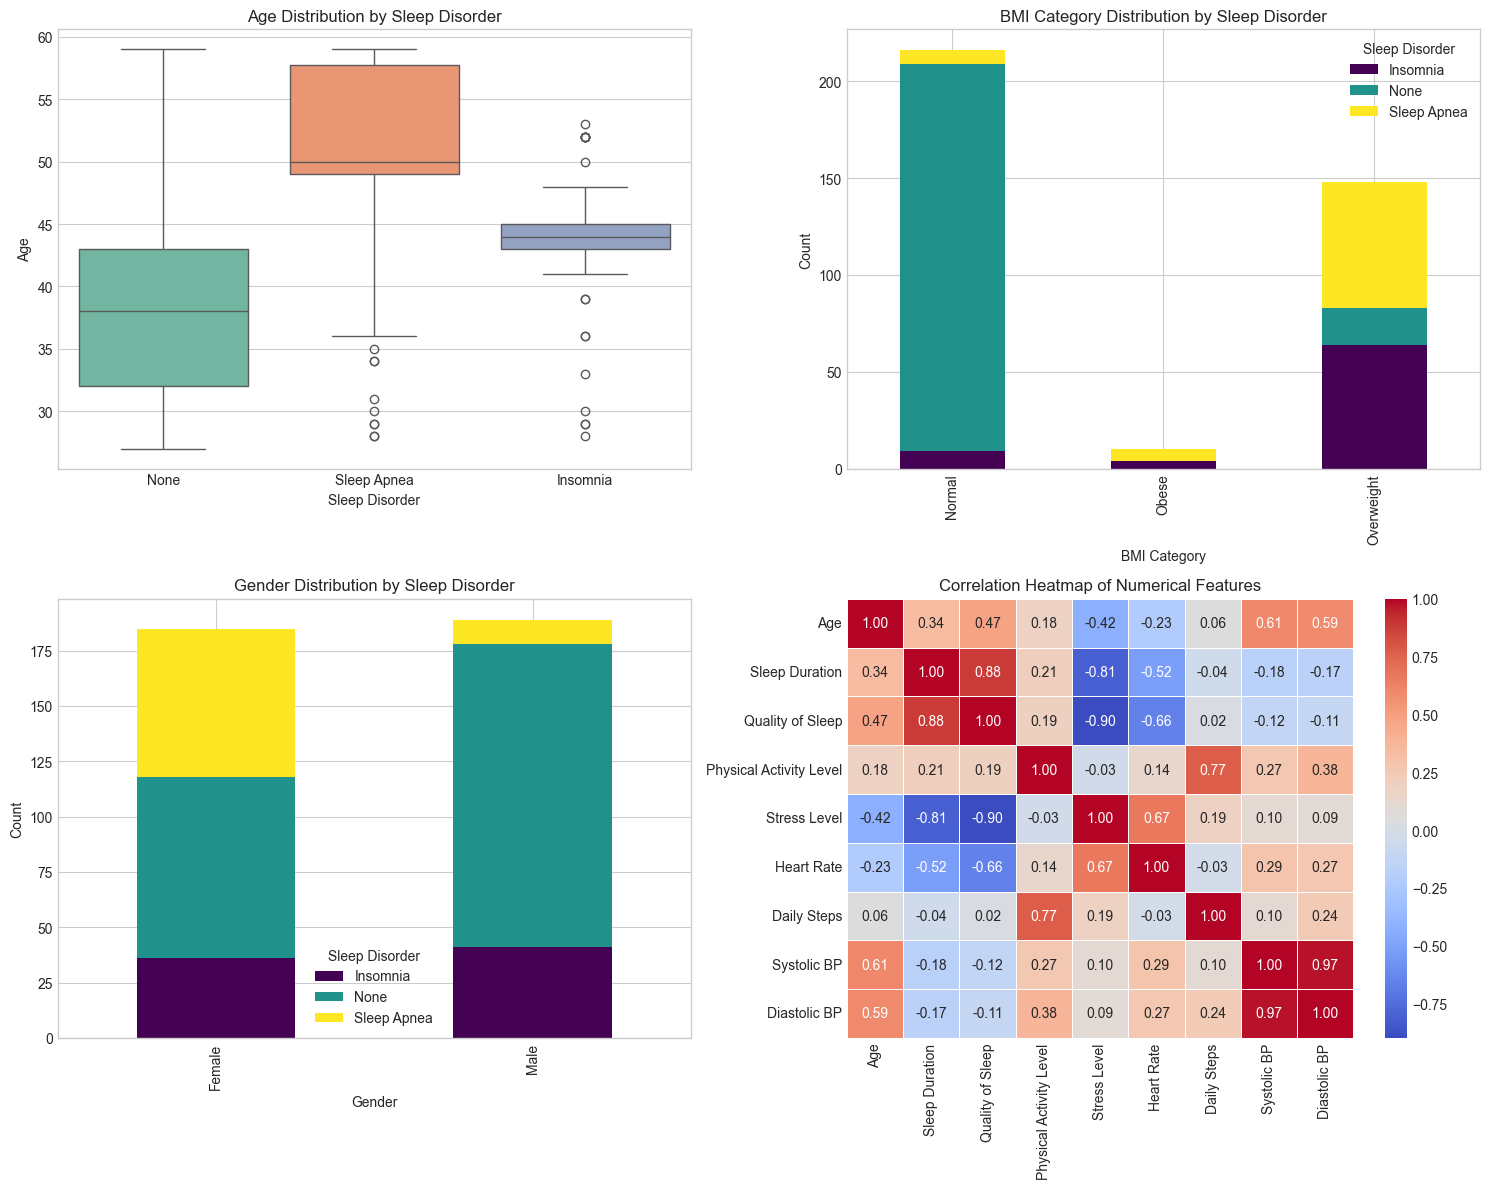


Preparing data for modeling...

Building and evaluating models...

Logistic Regression Results:
Accuracy: 0.9468
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.94      0.84      0.89        19
        None       1.00      0.96      0.98        55
 Sleep Apnea       0.83      1.00      0.91        20

    accuracy                           0.95        94
   macro avg       0.92      0.94      0.93        94
weighted avg       0.95      0.95      0.95        94



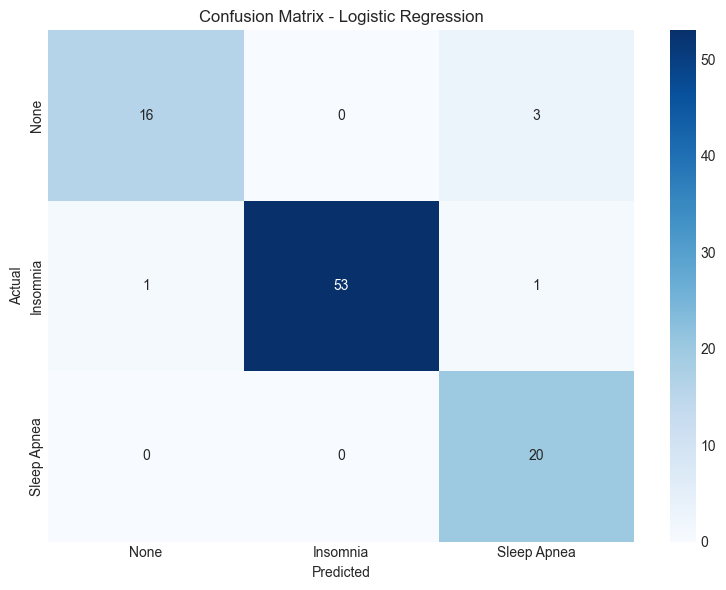


Linear Regression Results:
Accuracy: 0.8936
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.73      0.84      0.78        19
        None       1.00      0.91      0.95        55
 Sleep Apnea       0.82      0.90      0.86        20

    accuracy                           0.89        94
   macro avg       0.85      0.88      0.86        94
weighted avg       0.91      0.89      0.90        94



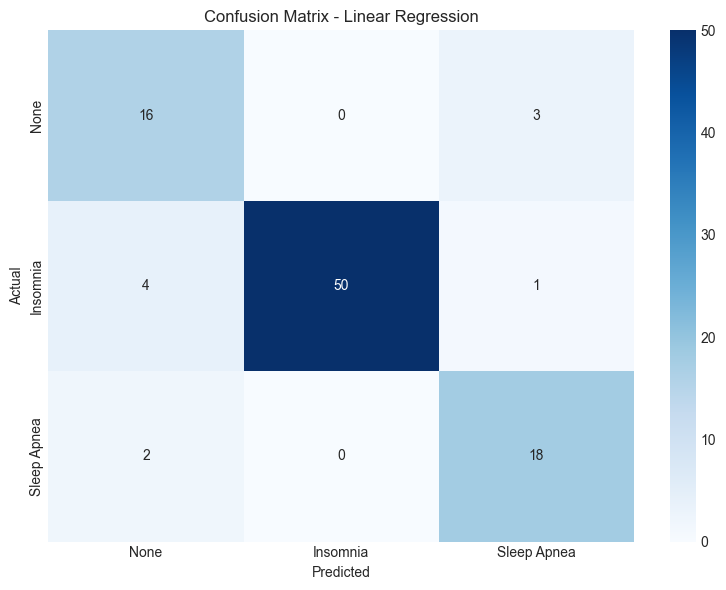


KNN Results:
Accuracy: 0.9362
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.86      0.95      0.90        19
        None       0.98      0.95      0.96        55
 Sleep Apnea       0.90      0.90      0.90        20

    accuracy                           0.94        94
   macro avg       0.91      0.93      0.92        94
weighted avg       0.94      0.94      0.94        94



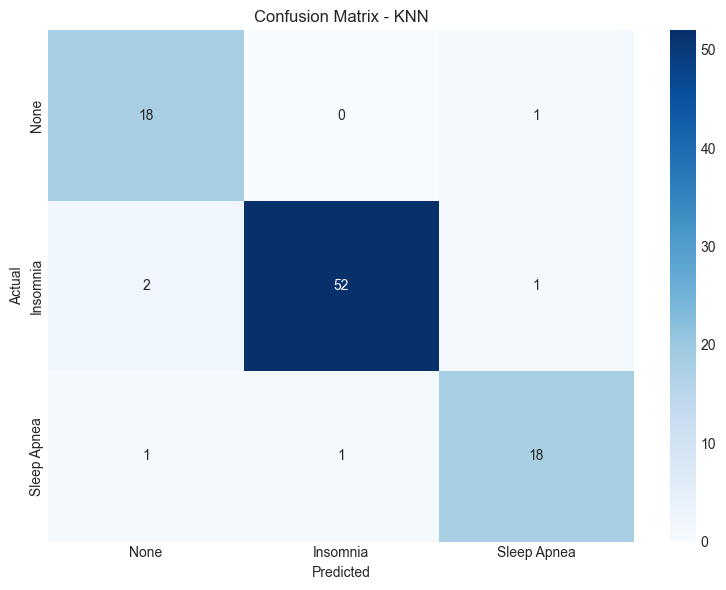


Naive Bayes Results:
Accuracy: 0.8830
Classification Report:
              precision    recall  f1-score   support

    Insomnia       0.80      0.84      0.82        19
        None       1.00      0.85      0.92        55
 Sleep Apnea       0.74      1.00      0.85        20

    accuracy                           0.88        94
   macro avg       0.85      0.90      0.86        94
weighted avg       0.90      0.88      0.89        94



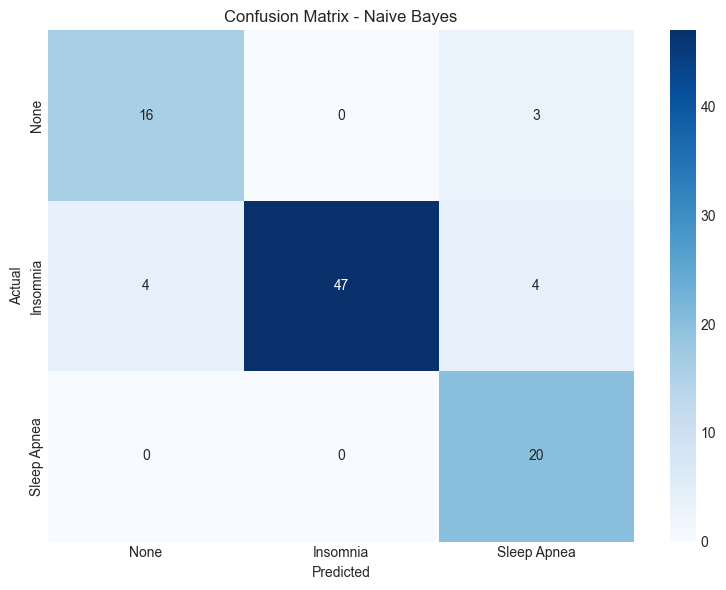


Comparing model performances...


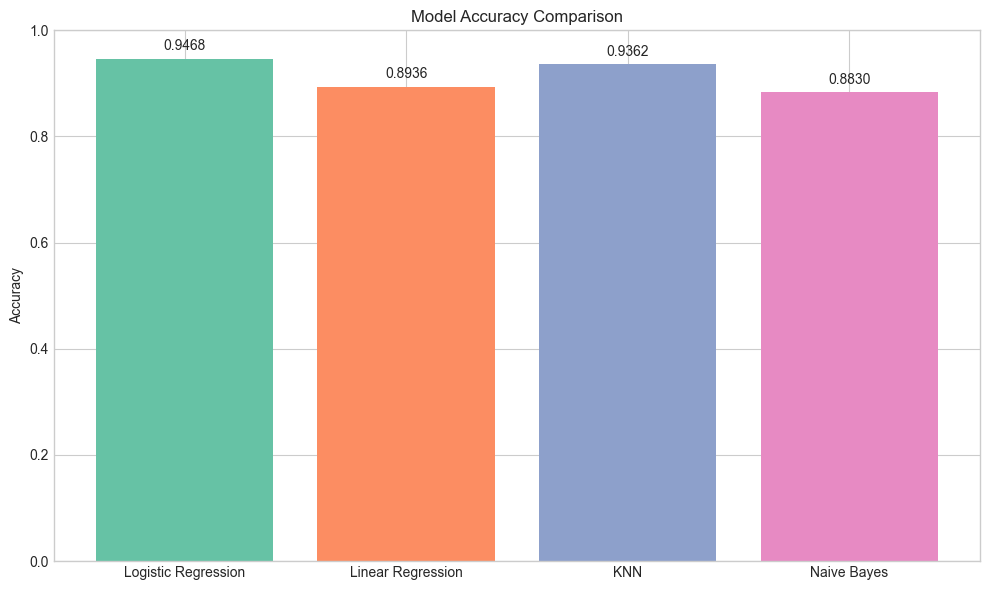

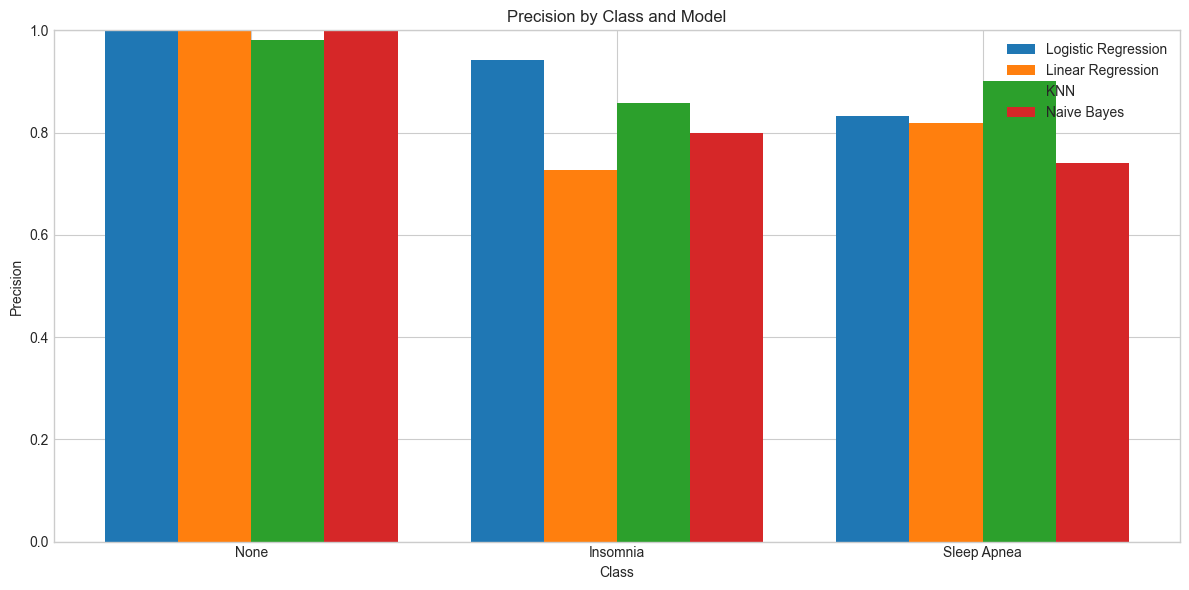

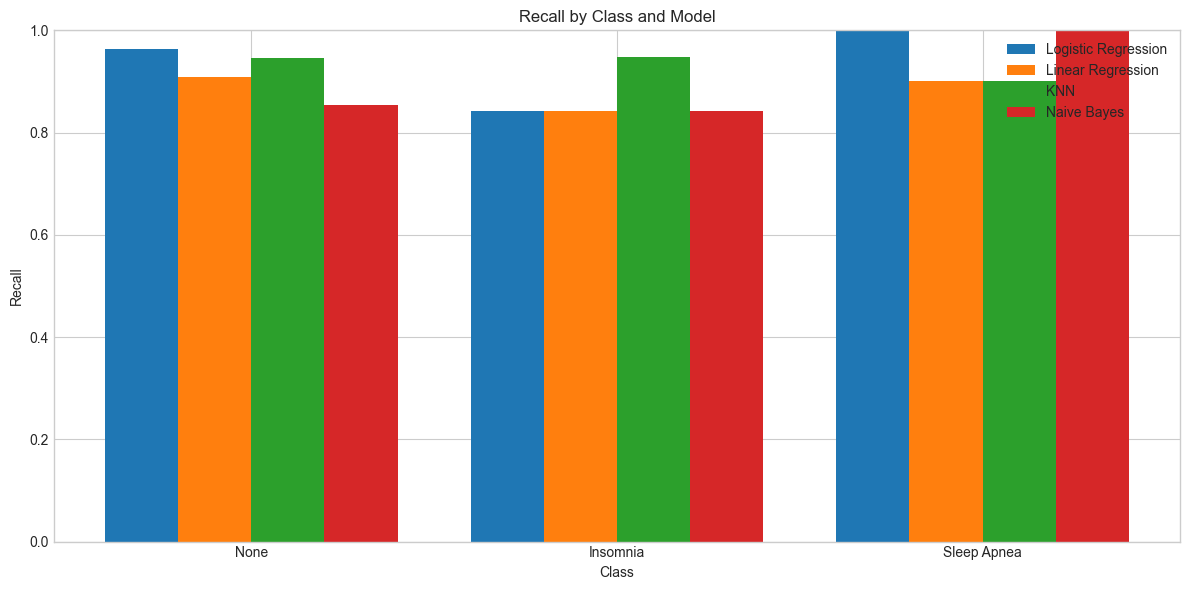

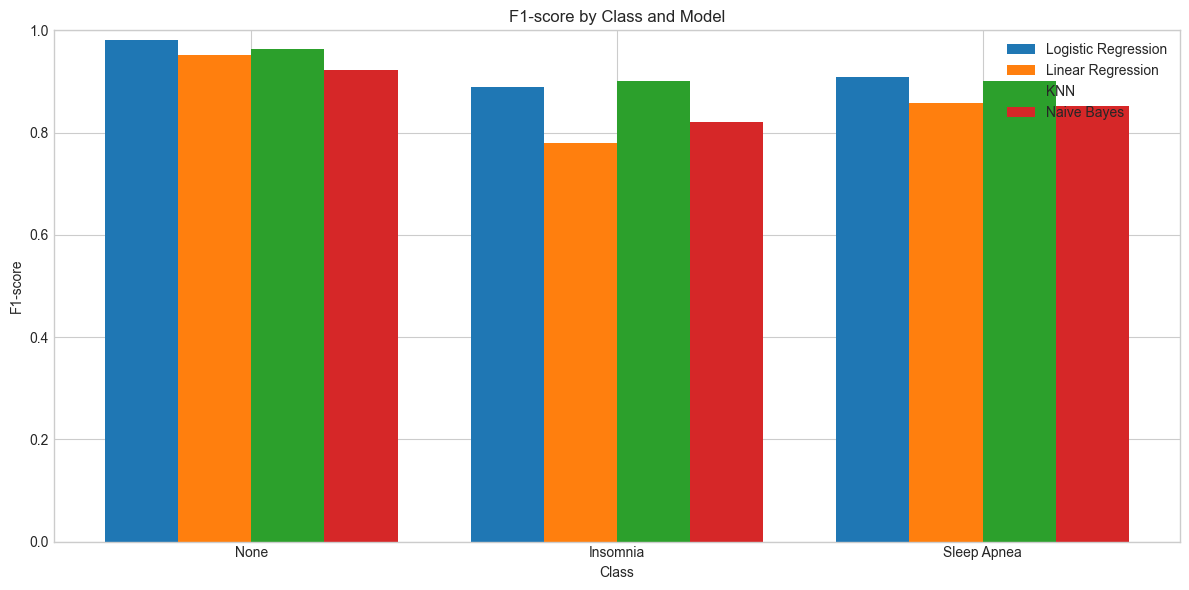


Model Performance Summary:
                     Accuracy  Precision (Weighted)  Recall (Weighted)  \
Model                                                                    
Logistic Regression    0.9468                0.9526             0.9468   
Linear Regression      0.8936                0.9062             0.8936   
KNN                    0.9362                0.9388             0.9362   
Naive Bayes            0.8830                0.9044             0.8830   

                     F1-Score (Weighted)  
Model                                     
Logistic Regression               0.9474  
Linear Regression                 0.8974  
KNN                               0.9368  
Naive Bayes                       0.8861  

Detailed Class-wise Performance:
                                 Precision  Recall  F1-Score
Model               Class                                   
Logistic Regression None            1.0000  0.9636    0.9815
                    Insomnia        0.9412  0.8421  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.multiclass import OneVsRestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set the style for the plots
plt.style.use('seaborn-v0_8-whitegrid')
colors = sns.color_palette("Set2")

# Function to load and preprocess the data
def load_data(filepath):
    """
    Load the Sleep Health and Lifestyle Dataset and preprocess it
    
    Parameters:
    filepath (str): Path to the CSV file
    
    Returns:
    pandas.DataFrame: Preprocessed dataframe
    """
    # Load the dataset
    df = pd.read_csv(filepath)
    
    # Replace missing values in the 'Sleep Disorder' column with 'None'
    df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')
    
    # Drop duplicates
    df = df.drop_duplicates().reset_index(drop=True)
    
    # Split Blood Pressure into Systolic and Diastolic
    df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
    
    # Fix inconsistencies in BMI Category if any
    mapping = {'Normal Weight': 'Normal', 'Normal': 'Normal', 'Overweight': 'Overweight', 'Obese': 'Obese'}
    df['BMI Category'] = df['BMI Category'].map(mapping)
    
    # Drop the 'Person ID' column as it's just an identifier
    df = df.drop('Person ID', axis=1)
    
    return df

# Function for exploratory data analysis
def exploratory_analysis(df):
    """
    Perform exploratory data analysis on the dataset
    
    Parameters:
    df (pandas.DataFrame): The dataset
    """
    # Basic statistics
    print("Dataset Shape:", df.shape)
    print("\nData Types:")
    print(df.dtypes)
    print("\nBasic Statistics:")
    print(df.describe().T)
    print("\nSleep Disorder Distribution:")
    print(df['Sleep Disorder'].value_counts())
    
    # Set up the figure for visualizations
    plt.figure(figsize=(15, 12))
    
    # 1. Sleep Disorder Distribution
    plt.subplot(2, 2, 1)
    sns.countplot(x='Sleep Disorder', data=df, palette=colors)
    plt.title('Sleep Disorder Distribution')
    plt.xlabel('Sleep Disorder')
    plt.ylabel('Count')
    
    # 2. Sleep Duration by Sleep Disorder
    plt.subplot(2, 2, 2)
    sns.boxplot(x='Sleep Disorder', y='Sleep Duration', data=df, palette=colors)
    plt.title('Sleep Duration by Sleep Disorder')
    plt.xlabel('Sleep Disorder')
    plt.ylabel('Sleep Duration (hours)')
    
    # 3. Quality of Sleep by Sleep Disorder
    plt.subplot(2, 2, 3)
    sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df, palette=colors)
    plt.title('Quality of Sleep by Sleep Disorder')
    plt.xlabel('Sleep Disorder')
    plt.ylabel('Quality of Sleep (1-10)')
    
    # 4. Stress Level by Sleep Disorder
    plt.subplot(2, 2, 4)
    sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df, palette=colors)
    plt.title('Stress Level by Sleep Disorder')
    plt.xlabel('Sleep Disorder')
    plt.ylabel('Stress Level (1-10)')
    
    plt.tight_layout()
    plt.savefig('sleep_disorder_distributions.png')
    plt.show()
    
    # Additional visualizations
    plt.figure(figsize=(15, 12))
    
    # 1. Age Distribution by Sleep Disorder
    plt.subplot(2, 2, 1)
    sns.boxplot(x='Sleep Disorder', y='Age', data=df, palette=colors)
    plt.title('Age Distribution by Sleep Disorder')
    plt.xlabel('Sleep Disorder')
    plt.ylabel('Age')
    
    print("\nUnique values in BMI Category column:", df['BMI Category'].unique())
    print("Value counts in BMI Category column:")
    print(df['BMI Category'].value_counts())

    print("\nUnique values in Gender column:", df['Gender'].unique())
    print("Value counts in Gender column:")
    print(df['Gender'].value_counts())

    # BMI Category Distribution by Sleep Disorder
    plt.subplot(2, 2, 2)
    bmi_crosstab = pd.crosstab(df['BMI Category'], df['Sleep Disorder'])
    bmi_crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
    plt.title('BMI Category Distribution by Sleep Disorder')
    plt.xlabel('BMI Category')
    plt.ylabel('Count')

    # Gender Distribution by Sleep Disorder
    plt.subplot(2, 2, 3)
    gender_crosstab = pd.crosstab(df['Gender'], df['Sleep Disorder'])
    gender_crosstab.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())
    plt.title('Gender Distribution by Sleep Disorder')
    plt.xlabel('Gender')
    plt.ylabel('Count')

    # # 2. BMI Category Distribution by Sleep Disorder
    # plt.subplot(2, 2, 2)
    # pd.crosstab(df['BMI Category'], df['Sleep Disorder']).plot(kind='bar', stacked=True, colormap='viridis')
    # plt.title('BMI Category Distribution by Sleep Disorder')
    # plt.xlabel('BMI Category')
    # plt.ylabel('Count')
    
    # # 3. Gender Distribution by Sleep Disorder
    # plt.subplot(2, 2, 3)
    # pd.crosstab(df['Gender'], df['Sleep Disorder']).plot(kind='bar', stacked=True, colormap='viridis')
    # plt.title('Gender Distribution by Sleep Disorder')
    # plt.xlabel('Gender')
    # plt.ylabel('Count')
    
    # 4. Correlation Heatmap
    plt.subplot(2, 2, 4)
    # Select only numerical columns for correlation
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    corr = df[numerical_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
    plt.title('Correlation Heatmap of Numerical Features')
    
    plt.tight_layout()
    plt.savefig('sleep_disorder_demographics.png')
    plt.show()

# Function to prepare data for modeling
def prepare_data_for_modeling(df):
    """
    Prepare the data for modeling by splitting features and target
    
    Parameters:
    df (pandas.DataFrame): The preprocessed dataset
    
    Returns:
    tuple: X (features), y (target), X_train, X_test, y_train, y_test
    """
    # Define features and target
    X = df.drop('Sleep Disorder', axis=1)
    y = df['Sleep Disorder']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
    
    # Define which columns should be encoded vs scaled
    categorical_features = ['Gender', 'Occupation', 'BMI Category']
    numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 
                         'Stress Level', 'Systolic BP', 'Diastolic BP', 'Heart Rate', 'Daily Steps']
    
    # Create preprocessing pipelines for both numeric and categorical data
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    # Combine preprocessing steps
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    return X, y, X_train, X_test, y_train, y_test, preprocessor

# Function to build and evaluate models
def build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor):
    """
    Build and evaluate different classification models
    
    Parameters:
    X_train, X_test, y_train, y_test: Train and test data
    preprocessor: ColumnTransformer for preprocessing
    
    Returns:
    dict: Dictionary of fitted models and their evaluation metrics
    """
    # Define the models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Linear Regression': LinearRegression(),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB()
    }
    
    # Dictionary to store results
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        # Create a pipeline with preprocessing and the model
        if name == 'Linear Regression':
            # For Linear Regression, create a mapping for the target
            # Since Linear Regression is not meant for classification
            # We'll map None to 0, Insomnia to 1, Sleep Apnea to 2
            y_train_mapped = y_train.map({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})
            y_test_mapped = y_test.map({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})
            
            # Train the model
            pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
            pipeline.fit(X_train, y_train_mapped)
            
            # Make predictions (and round to nearest integer for Linear Regression)
            y_pred_raw = pipeline.predict(X_test)
            y_pred_mapped = np.round(y_pred_raw).clip(0, 2).astype(int)
            
            # Map back to original classes
            mapping = {0: 'None', 1: 'Insomnia', 2: 'Sleep Apnea'}
            y_pred = np.array([mapping[i] for i in y_pred_mapped])
            
        else:
            # For classification models
            pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        cm = confusion_matrix(y_test, y_pred)
        
        # Store results
        results[name] = {
            'pipeline': pipeline,
            'accuracy': accuracy,
            'report': report,
            'confusion_matrix': cm,
            'y_pred': y_pred
        }
        
        # Print results
        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        
        # Generate confusion matrix plot
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=['None', 'Insomnia', 'Sleep Apnea'],
                   yticklabels=['None', 'Insomnia', 'Sleep Apnea'])
        plt.title(f'Confusion Matrix - {name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.savefig(f'confusion_matrix_{name.replace(" ", "_").lower()}.png')
        plt.show()
        
    return results

# Function to compare models
def compare_models(results):
    """
    Compare the performance of different models
    
    Parameters:
    results (dict): Dictionary of model results
    """
    # Extract accuracies for comparison
    accuracies = {name: result['accuracy'] for name, result in results.items()}
    
    # Extract class-wise metrics for comparison
    class_metrics = {}
    for name, result in results.items():
        report = result['report']
        class_metrics[name] = {
            'None': {
                'precision': report['None']['precision'],
                'recall': report['None']['recall'],
                'f1-score': report['None']['f1-score']
            },
            'Insomnia': {
                'precision': report['Insomnia']['precision'],
                'recall': report['Insomnia']['recall'],
                'f1-score': report['Insomnia']['f1-score']
            },
            'Sleep Apnea': {
                'precision': report['Sleep Apnea']['precision'],
                'recall': report['Sleep Apnea']['recall'],
                'f1-score': report['Sleep Apnea']['f1-score']
            }
        }
    
    # Plot accuracy comparison
    plt.figure(figsize=(10, 6))
    bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
    
    # Add accuracy values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom')
    
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.0)
    plt.tight_layout()
    plt.savefig('model_accuracy_comparison.png')
    plt.show()
    
    # Create separate plots for precision, recall, and f1-score for each class
    metrics = ['precision', 'recall', 'f1-score']
    classes = ['None', 'Insomnia', 'Sleep Apnea']
    
    for metric in metrics:
        plt.figure(figsize=(12, 6))
        x = np.arange(len(classes))
        width = 0.2
        
        for i, (name, result) in enumerate(class_metrics.items()):
            values = [result[cls][metric] for cls in classes]
            plt.bar(x + i*width - 0.3, values, width, label=name)
        
        plt.xlabel('Class')
        plt.ylabel(metric.capitalize())
        plt.title(f'{metric.capitalize()} by Class and Model')
        plt.xticks(x, classes)
        plt.legend()
        plt.ylim(0, 1.0)
        plt.tight_layout()
        plt.savefig(f'model_comparison_{metric}.png')
        plt.show()
    
    # Create a summary table
    summary_df = pd.DataFrame({
        'Model': list(accuracies.keys()),
        'Accuracy': list(accuracies.values()),
        'Precision (Weighted)': [results[name]['report']['weighted avg']['precision'] for name in accuracies.keys()],
        'Recall (Weighted)': [results[name]['report']['weighted avg']['recall'] for name in accuracies.keys()],
        'F1-Score (Weighted)': [results[name]['report']['weighted avg']['f1-score'] for name in accuracies.keys()]
    })
    
    print("\nModel Performance Summary:")
    print(summary_df.set_index('Model').round(4))
    
    # Create a detailed summary table with class-wise metrics
    detailed_rows = []
    for model_name in accuracies.keys():
        for cls in classes:
            detailed_rows.append({
                'Model': model_name,
                'Class': cls,
                'Precision': class_metrics[model_name][cls]['precision'],
                'Recall': class_metrics[model_name][cls]['recall'],
                'F1-Score': class_metrics[model_name][cls]['f1-score']
            })
    
    detailed_df = pd.DataFrame(detailed_rows)
    
    print("\nDetailed Class-wise Performance:")
    print(detailed_df.set_index(['Model', 'Class']).round(4))
    
    return summary_df, detailed_df

# Main function to run the analysis and modeling pipeline
def main(filepath):
    """
    Main function to run the entire analysis and modeling pipeline
    
    Parameters:
    filepath (str): Path to the CSV file
    """
    # Load and preprocess the data
    print("Loading and preprocessing data...")
    df = load_data(filepath)
    
    # Perform exploratory data analysis
    print("\nPerforming exploratory analysis...")
    exploratory_analysis(df)
    
    # Prepare data for modeling
    print("\nPreparing data for modeling...")
    X, y, X_train, X_test, y_train, y_test, preprocessor = prepare_data_for_modeling(df)
    
    # Build and evaluate models
    print("\nBuilding and evaluating models...")
    results = build_and_evaluate_models(X_train, X_test, y_train, y_test, preprocessor)
    
    # Compare model performances
    print("\nComparing model performances...")
    summary_df, detailed_df = compare_models(results)
    
    # Save the summary tables
    summary_df.to_csv('model_performance_summary.csv', index=False)
    detailed_df.to_csv('model_performance_detailed.csv', index=False)
    
    print("\nAnalysis complete! Results saved to CSV files and plots saved as PNG images.")
    
    return results, summary_df, detailed_df

# Run the main function if this script is executed
if __name__ == "__main__":
    # Set the filepath to the CSV file
    filepath = "/Users/chun-feitan/Desktop/Sleep_health_and_lifestyle_dataset.csv"
    
    # Run the main function
    results, summary_df, detailed_df = main(filepath)